In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import warnings as wr
wr.filterwarnings('ignore')


In [2]:
df=pd.read_csv('mall customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# df=df.drop(['CustomerID','Gender'],axis=1)
df.drop(['CustomerID','Gender'],axis=1, inplace=True)
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [4]:
df.rename(columns={'Age':'age', 'Annual Income (k$)':'income' , 'Spending Score (1-100)':'rating'}, inplace=True)

In [5]:
df.head()

,age,income,rating
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [6]:
df.shape

(200, 3)

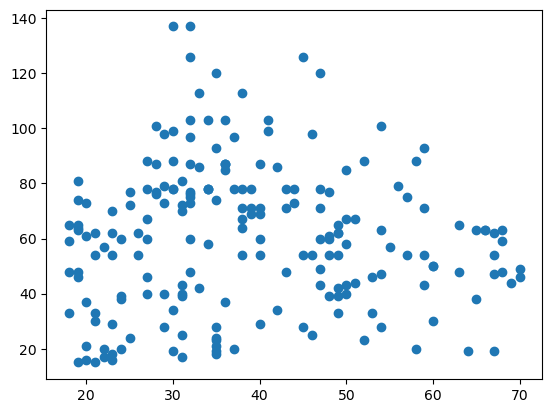

In [7]:
plt.scatter(df.age, df.income)

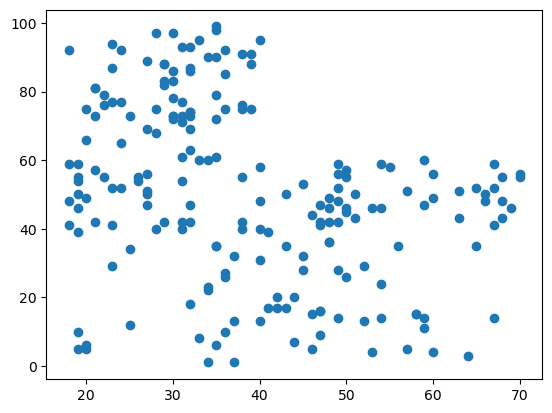

In [8]:
plt.scatter(df.age,df.rating)

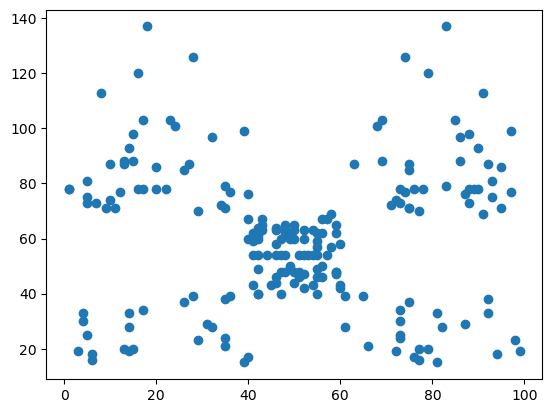

In [9]:
plt.scatter(df.rating, df.income)

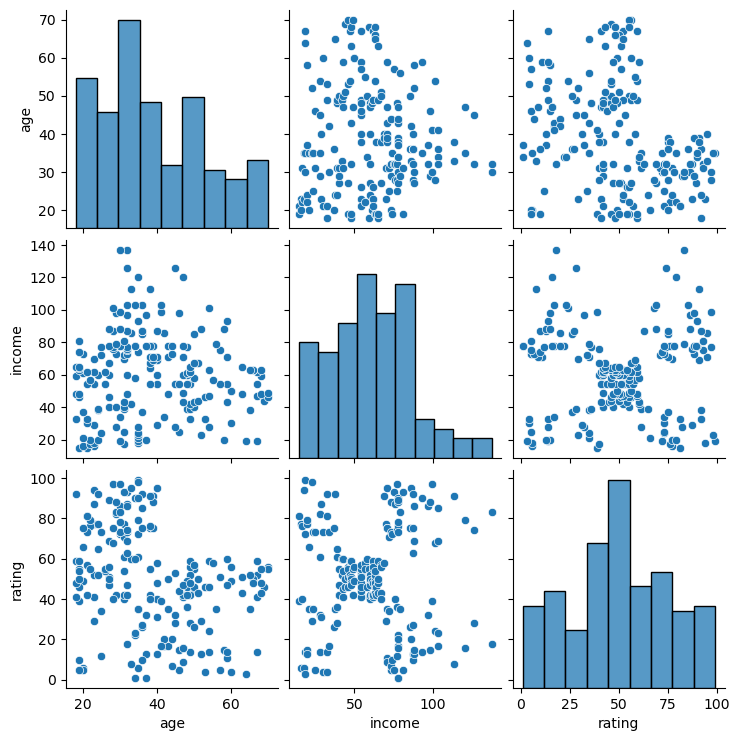

In [10]:
import seaborn as sns
sns.pairplot(df[['age','income','rating']])
plt.savefig('image.png')

# KMEANS CLUSTER 

Text(0.5, 1.0, 'income and rating plot of customers')

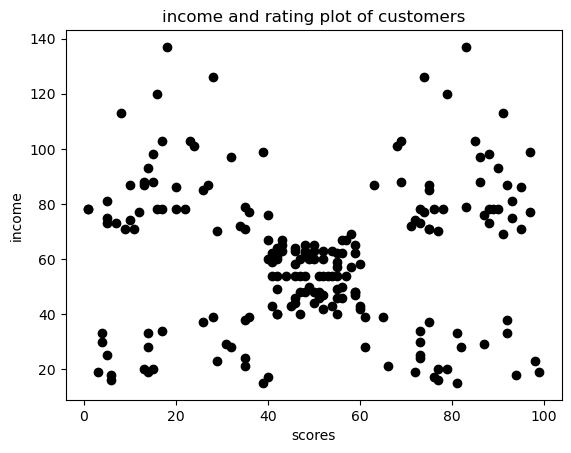

In [11]:
plt.scatter(df.rating, df.income,color='black')
plt.xlabel('scores')
plt.ylabel('income')
plt.title('income and rating plot of customers')

In [12]:
from sklearn.cluster import KMeans

In [13]:
km=KMeans() #n_clusters=8

In [14]:
km.fit(df[['rating','income']]) # fit_predict()

KMeans()

In [15]:
df['Group1']=km.predict(df[['rating','income']])


In [16]:
km.cluster_centers_

array([[ 15.59375   ,  89.40625   ],
       [ 80.04761905,  25.0952381 ],
       [ 81.89285714,  78.03571429],
       [ 52.16666667,  47.71428571],
       [ 82.72727273, 108.18181818],
       [  9.58333333,  24.58333333],
       [ 46.1627907 ,  63.72093023],
       [ 33.27272727,  28.18181818]])

In [17]:
df

,age,income,rating,Group1
0,19,15,39,7
1,21,15,81,1
2,20,16,6,5
3,23,16,77,1
4,31,17,40,7
...,...,...,...,...
195,35,120,79,4
196,45,126,28,0
197,32,126,74,4
198,32,137,18,0


In [18]:
# dataset  of each group 
df0=df[df.Group1==0]
df1=df[df.Group1==1]
df2=df[df.Group1==2]
df3=df[df.Group1==3]
df4=df[df.Group1==4]
df5=df[df.Group1==5]
df6=df[df.Group1==6]
df7=df[df.Group1==7]



In [19]:
df0.head()

,age,income,rating,Group1
128,59,71,11,0
130,47,71,9,0
134,20,73,5,0
136,44,73,7,0
138,19,74,10,0


In [20]:
df2.head()

,age,income,rating,Group1
123,39,69,91,2
125,31,70,77,2
127,40,71,95,2
129,38,71,75,2
131,39,71,75,2


In [21]:
centroid=km.cluster_centers_
centroid

array([[ 15.59375   ,  89.40625   ],
       [ 80.04761905,  25.0952381 ],
       [ 81.89285714,  78.03571429],
       [ 52.16666667,  47.71428571],
       [ 82.72727273, 108.18181818],
       [  9.58333333,  24.58333333],
       [ 46.1627907 ,  63.72093023],
       [ 33.27272727,  28.18181818]])

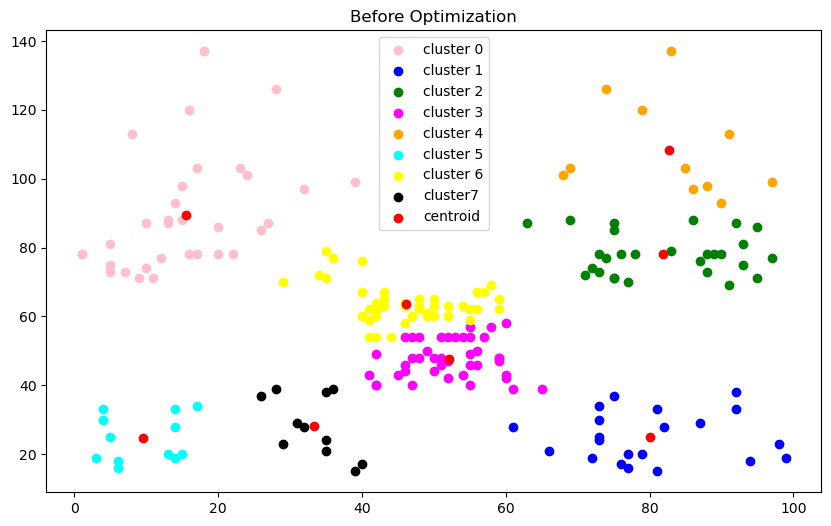

In [22]:
plt.figure(figsize=(10,6))

plt.scatter(df0.rating, df0.income, color='pink',   label='cluster 0')
plt.scatter(df1.rating, df1.income, color='blue',   label='cluster 1')
plt.scatter(df2.rating, df2.income, color='green',  label='cluster 2')
plt.scatter(df3.rating, df3.income, color='magenta',label='cluster 3')
plt.scatter(df4.rating, df4.income, color='orange',  label='cluster 4')
plt.scatter(df5.rating, df5.income, color='cyan',   label='cluster 5')
plt.scatter(df6.rating, df6.income, color='yellow', label='cluster 6')
plt.scatter(df7.rating, df7.income, color='black', label='cluster7')

plt.scatter(centroid[:,0], centroid[:,1], color='red',label='centroid')

plt.title('Before Optimization')

plt.legend()


# Optimizing KMEANS

In [23]:
wcss=[]
cluster=range(1,15)
for k in cluster:
    km2=KMeans(n_clusters=k)
    km2.fit(df[['rating','income']])
    wcss.append(km2.inertia_)
    

In [24]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211118,
 73880.64496247194,
 44448.45544793371,
 38463.49408903117,
 30241.343617936593,
 30093.53135469603,
 25939.632634489844,
 21345.260722086914,
 18997.051495566713,
 17371.002068302067,
 15296.680997022304,
 13352.907022413068]

Text(0.5, 0, 'Cluster')

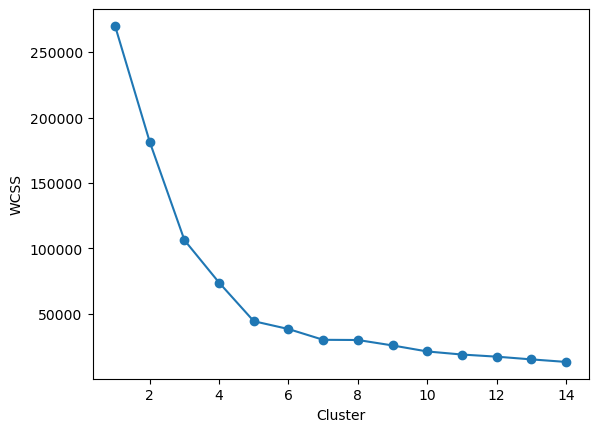

In [25]:
plt.plot(range(1,15), wcss ,marker='o') # line plot

plt.ylabel('WCSS')
plt.xlabel('Cluster')


In [26]:
!pip install kneed

In [27]:
from kneed import KneeLocator

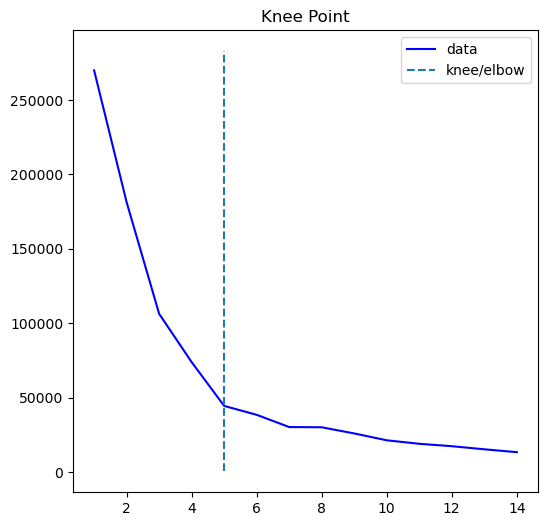

In [28]:
kn= KneeLocator(cluster, wcss, direction='decreasing', curve='convex')
kn.plot_knee()

In [29]:
kn.knee

5

# After Opetimizing

In [30]:
km=KMeans(n_clusters=5, random_state=0) # i know 5 is optimal
df['Group2']=km.fit_predict(df[['rating','income']]) # fit_predict()


In [31]:
print(type(km))
df.head()

<class 'sklearn.cluster._kmeans.KMeans'>


,age,income,rating,Group1,Group2
0,19,15,39,7,3
1,21,15,81,1,4
2,20,16,6,5,3
3,23,16,77,1,4
4,31,17,40,7,3


In [32]:
df.drop(['Group1'],axis=1, inplace=True)
df.head()

,age,income,rating,Group2
0,19,15,39,3
1,21,15,81,4
2,20,16,6,3
3,23,16,77,4
4,31,17,40,3


In [33]:
cen=km.cluster_centers_
cen

array([[49.51851852, 55.2962963 ],
       [82.12820513, 86.53846154],
       [17.11428571, 88.2       ],
       [20.91304348, 26.30434783],
       [79.36363636, 25.72727273]])

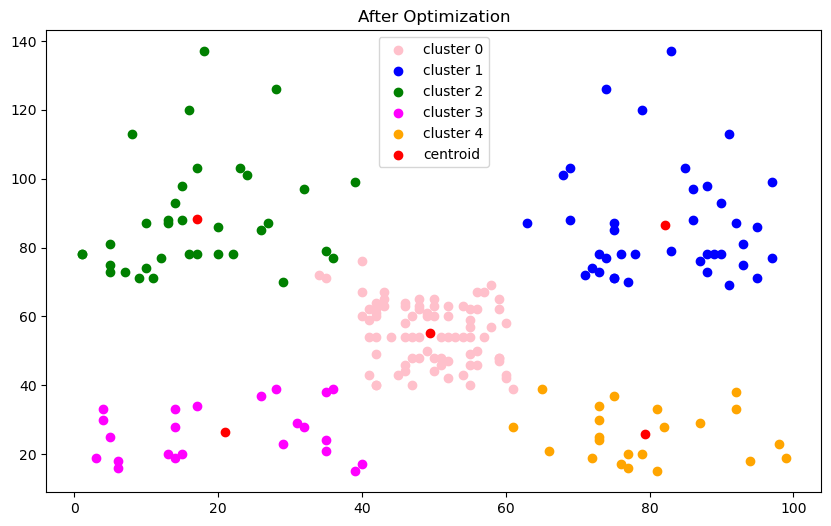

In [34]:
df0=df[df.Group2==0]
df1=df[df.Group2==1]
df2=df[df.Group2==2]
df3=df[df.Group2==3]
df4=df[df.Group2==4]

plt.figure(figsize=(10,6))
plt.scatter(df0.rating, df0.income, color='pink',   label='cluster 0')
plt.scatter(df1.rating, df1.income, color='blue',   label='cluster 1')
plt.scatter(df2.rating, df2.income, color='green',  label='cluster 2')
plt.scatter(df3.rating, df3.income, color='magenta',label='cluster 3')
plt.scatter(df4.rating, df4.income, color='orange',  label='cluster 4')

plt.scatter(cen[:, 0], cen[:,1], color='red', label='centroid')
plt.title('After Optimization')

plt.legend()

In [35]:
df0.head()

,age,income,rating,Group2
43,31,39,61,0
46,50,40,55,0
47,27,40,47,0
48,29,40,42,0
49,31,40,42,0


In [36]:
df1.head()

,age,income,rating,Group2
123,39,69,91,1
125,31,70,77,1
127,40,71,95,1
129,38,71,75,1
131,39,71,75,1


In [37]:
df2.head()


,age,income,rating,Group2
124,23,70,29,2
128,59,71,11,2
130,47,71,9,2
134,20,73,5,2
136,44,73,7,2


In [38]:
df3.head()


,age,income,rating,Group2
0,19,15,39,3
2,20,16,6,3
4,31,17,40,3
6,35,18,6,3
8,64,19,3,3


In [39]:
df4.head()

,age,income,rating,Group2
1,21,15,81,4
3,23,16,77,4
5,22,17,76,4
7,23,18,94,4
9,30,19,72,4


<Axes: xlabel='Group2', ylabel='income'>

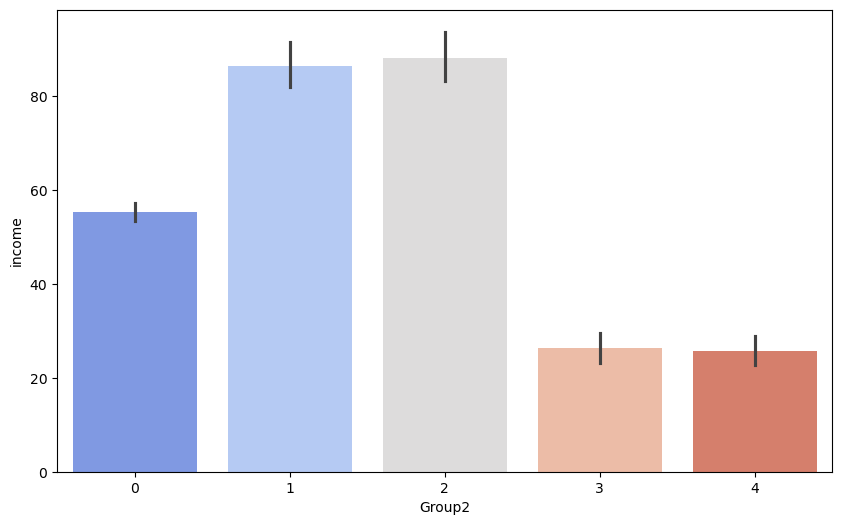

In [40]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='Group2',y='income',data=df,palette='coolwarm')

<Axes: xlabel='Group2', ylabel='age'>

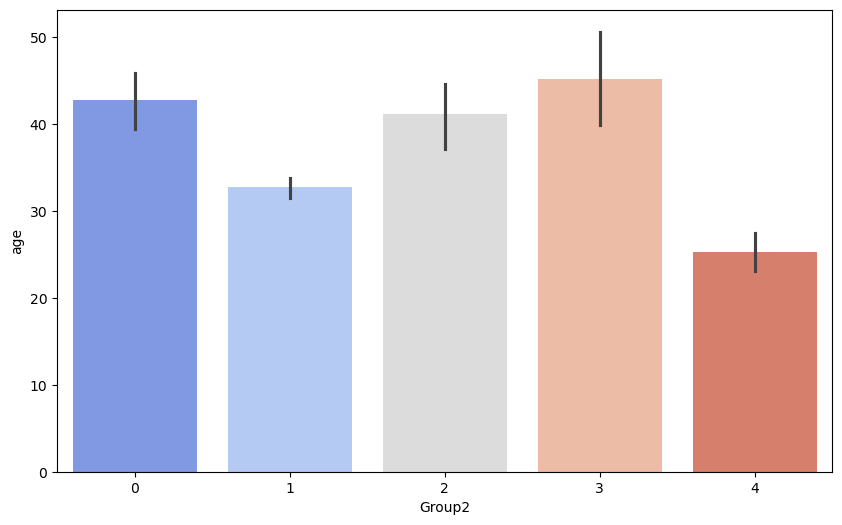

In [41]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='Group2',y='age',data=df,palette='coolwarm')

<Axes: xlabel='Group2', ylabel='rating'>

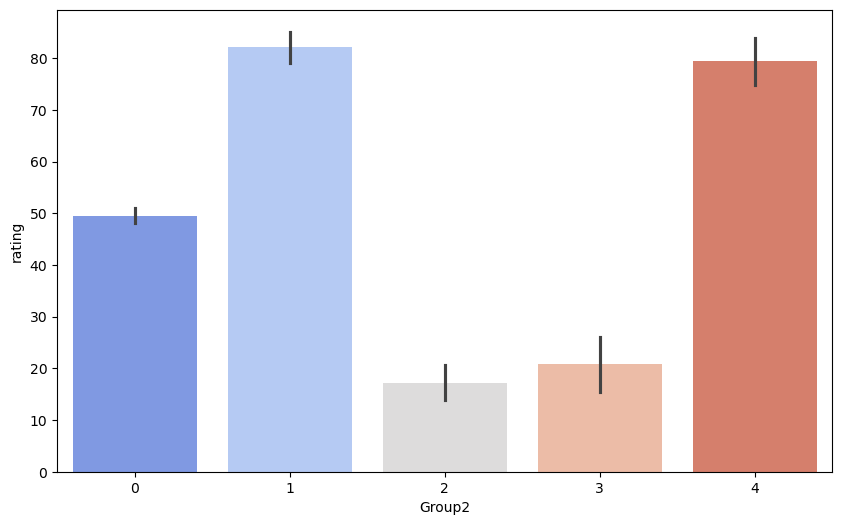

In [42]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='Group2',y='rating',data=df,palette='coolwarm')

In [43]:
cluster_means = df.groupby('Group2').mean()
print(cluster_means)

              age     income     rating
Group2                                 
0       42.716049  55.296296  49.518519
1       32.692308  86.538462  82.128205
2       41.114286  88.200000  17.114286
3       45.217391  26.304348  20.913043
4       25.272727  25.727273  79.363636


In [52]:
# interpretation of characteristics 

cluster_names = {
       0:'Middle-Aged and Moderate Earners',
       1:'Young High Earners',
       2:'Middle-Aged High Earners',
       3:'Older Low Earners',
       4:'Young Low Earners',
   }
df['group'] = df['Group2'].map(cluster_names)
print(df[['age','income','rating','group']])

     age  income  rating                     group
0     19      15      39         Older Low Earners
1     21      15      81         Young Low Earners
2     20      16       6         Older Low Earners
3     23      16      77         Young Low Earners
4     31      17      40         Older Low Earners
..   ...     ...     ...                       ...
195   35     120      79        Young High Earners
196   45     126      28  Middle-Aged High Earners
197   32     126      74        Young High Earners
198   32     137      18  Middle-Aged High Earners
199   30     137      83        Young High Earners

[200 rows x 4 columns]


In [53]:
df0=df[df.group=='Middle-Aged and Moderate Earners']
df0

,age,income,rating,Group2,group
43,31,39,61,0,Middle-Aged and Moderate Earners
46,50,40,55,0,Middle-Aged and Moderate Earners
47,27,40,47,0,Middle-Aged and Moderate Earners
48,29,40,42,0,Middle-Aged and Moderate Earners
49,31,40,42,0,Middle-Aged and Moderate Earners
...,...,...,...,...,...
121,38,67,40,0,Middle-Aged and Moderate Earners
122,40,69,58,0,Middle-Aged and Moderate Earners
126,43,71,35,0,Middle-Aged and Moderate Earners
132,25,72,34,0,Middle-Aged and Moderate Earners
